# Nama : Hahan Nur Rizky
# NIM  : 2000016038

### Crawling Data Mixue dari Twitter

In [3]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

In [4]:
query = "mixue"
tweets = []
limit = 100

%time
try:
    print("Start crawling")
    for tweet in sntwitter.TwitterSearchScraper(query=query).get_items():
        if len(tweets) == limit:
            break
        else:
            tweets.append([tweet.user.username, tweet.content])
    df = pd.DataFrame(tweets, columns=['username', 'content'])
except Exception as e:
    print(e)
        
print("selesai")

Wall time: 0 ns
Start crawling
selesai


In [5]:
df

,username,content
0,v4jr4,@icblues MiXue intensifies ~
1,bidadarikocakkk,Kalau nggak minum mixue tuh gk punya temen kah?
2,twtmaknae,Udah full mixue belum disanaaaaa sobattt\n@luv...
3,sakkurae,Mixue please stop gatekeeping the strawberry i...
4,initangg,Gais beli kfc or mixue ya?
...,...,...
95,k3tiklim4,@jihann jjn eskrim mixue tengahari mntp tuh makji
96,ilvuna_,@lastaligator ntar cipy nyanyi mixue 10jam
97,jnjjxyz,pengen mixue tpi disini blom ada😩
98,mamatolodon,@meitteok_ minum mixue bikin adem met


In [6]:
# Konversi dataframe menjadi string
text = df.to_string()

In [7]:
print(text)

           username                                                                                                                                                                                                                                                                              content
0             v4jr4                                                                                                                                                                                                                                                         @icblues MiXue intensifies ~
1   bidadarikocakkk                                                                                                                                                                                                                                      Kalau nggak minum mixue tuh gk punya temen kah?
2         twtmaknae                                                                                          

In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### tokenization

In [9]:

tokens = nltk.word_tokenize(text)

In [10]:
print(tokens)

['username', 'content', '0', 'v4jr4', '@', 'icblues', 'MiXue', 'intensifies', '~', '1', 'bidadarikocakkk', 'Kalau', 'nggak', 'minum', 'mixue', 'tuh', 'gk', 'punya', 'temen', 'kah', '?', '2', 'twtmaknae', 'Udah', 'full', 'mixue', 'belum', 'disanaaaaa', 'sobattt\\n', '@', 'luvtinyteez', 'https', ':', '//t.co/lepH4OqLRg', '3', 'sakkurae', 'Mixue', 'please', 'stop', 'gatekeeping', 'the', 'strawberry', 'ice', 'cream', '4', 'initangg', 'Gais', 'beli', 'kfc', 'or', 'mixue', 'ya', '?', '5', 'lhokgnot', '@', 'tanyakanrl', 'beli', 'franchise', 'mixue', 'nder', '6', 'astrnavt', 'ate', 'gak', 'wareg', 'yaopo', 'wong', 'roti', 'sisir', ',', 'mixue', ',', 'pangsit', ',', 'siomay', 'melbu', 'kabeh😣', '7', 'reginalexandraa', 'selamat', '100', 'juta', 'penduduk', 'jo', ',', 'jangan', 'lupa', 'mixue', 'nyaa', '😋', '@', 'jonathantasena', '8', 'heiseonberg', '@', 'uppersideffects', 'woy', 'MIXUE', '9', 'KawaiiKU_desu_', '@', 'HwongDesou', 'Di', 'sekitar', 'rumah', 'aku', 'ada', 'Ruko', 'yang', 'kebetulan'

### stemming

In [11]:

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [12]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [13]:
words = ["mixue"]

In [16]:
stemmed_tokens = [stemmer.stem(word) for word in tokens]

In [15]:
print(stemmed_tokens)

['username', 'content', '0', 'v4jr4', '', 'icblues', 'mixue', 'intensifies', '', '1', 'bidadarikocakkk', 'kalau', 'nggak', 'minum', 'mixue', 'tuh', 'gk', 'punya', 'temen', 'kah', '', '2', 'twtmaknae', 'udah', 'full', 'mixue', 'belum', 'disanaaaaa', 'sobattt n', '', 'luvtinyteez', 'https', '', 't co leph4oqlrg', '3', 'sakkurae', 'mixue', 'please', 'stop', 'gatekeeping', 'the', 'strawberry', 'ice', 'cream', '4', 'initangg', 'gais', 'beli', 'kfc', 'or', 'mixue', 'ya', '', '5', 'lhokgnot', '', 'tanyakanrl', 'beli', 'franchise', 'mixue', 'nder', '6', 'astrnavt', 'ate', 'gak', 'wareg', 'yaopo', 'wong', 'roti', 'sisir', '', 'mixue', '', 'pangsit', '', 'siomay', 'melbu', 'kabeh', '7', 'reginalexandraa', 'selamat', '100', 'juta', 'duduk', 'jo', '', 'jangan', 'lupa', 'mixue', 'nyaa', '', '', 'jonathantasena', '8', 'heiseonberg', '', 'uppersideffects', 'woy', 'mixue', '9', 'kawaiiku desu', '', 'hwongdesou', 'di', 'sekitar', 'rumah', 'aku', 'ada', 'ruko', 'yang', 'betul', 'di', 'sewa', 'kan', '', 

### Stop Word Removal

In [17]:


nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
from nltk.corpus import stopwords
stop_words = stopwords.words('indonesian')

In [19]:
#filter out the stopwords
filtered_tokens = [token for token in tokens if token not in stop_words]

In [20]:
print(filtered_tokens)

['username', 'content', '0', 'v4jr4', '@', 'icblues', 'MiXue', 'intensifies', '~', '1', 'bidadarikocakkk', 'Kalau', 'nggak', 'minum', 'mixue', 'tuh', 'gk', 'temen', 'kah', '?', '2', 'twtmaknae', 'Udah', 'full', 'mixue', 'disanaaaaa', 'sobattt\\n', '@', 'luvtinyteez', 'https', ':', '//t.co/lepH4OqLRg', '3', 'sakkurae', 'Mixue', 'please', 'stop', 'gatekeeping', 'the', 'strawberry', 'ice', 'cream', '4', 'initangg', 'Gais', 'beli', 'kfc', 'or', 'mixue', 'ya', '?', '5', 'lhokgnot', '@', 'tanyakanrl', 'beli', 'franchise', 'mixue', 'nder', '6', 'astrnavt', 'ate', 'gak', 'wareg', 'yaopo', 'roti', 'sisir', ',', 'mixue', ',', 'pangsit', ',', 'siomay', 'melbu', 'kabeh😣', '7', 'reginalexandraa', 'selamat', '100', 'juta', 'penduduk', 'jo', ',', 'lupa', 'mixue', 'nyaa', '😋', '@', 'jonathantasena', '8', 'heiseonberg', '@', 'uppersideffects', 'woy', 'MIXUE', '9', 'KawaiiKU_desu_', '@', 'HwongDesou', 'Di', 'rumah', 'Ruko', 'sewa', ',', 'Mixue', '10', 'Forelskeut', 'Mixue', ',', 'boncos', 'gue', 'lama-l

### Analisis sentimental positif dan negatif mengenai mixue

In [22]:
# Define a list of positive keywords
positive_keywords = ['enak','terbaik', 'bagus', 'suka','keren', 'hahan', 'manis', 'ganteng', 'banyak', 'like', 'icecreram', 'manisan']

# Define a list of negative keywords
negative_keywords = ['gasuka','aneh','buruk', 'benci', 'tidak', 'tidak suka','jelek', 'pedas', 'gaenak']

# Define a function to classify the sentiment of a piece of text
def classify_sentiment(text):
  # Initialize a counter for positive and negative keywords
    positive_count = 0
    negative_count = 0
    neutral =0
    status = ""
  
  # Split the text into individual words
    words = text.split()
   
  
  # Loop through each word and check if it is a positive or negative keyword
    for word in words:
        if word in positive_keywords:
            positive_count += 1
        elif word in negative_keywords:
            negative_count += 1
        else :
            neutral +=1
  
  # If there are more positive keywords, classify the text as positive
    if positive_count > negative_count:
         status = "Positif"
  # If there are more negative keywords, classify the text as negative
    elif negative_count > positive_count:
        status ='negative'
  # If there are an equal number of positive and negative keywords, classify the text as neutral
    else:
        status='neutral'
    return positive_count, negative_count, neutral, status
    # Visualize the results

In [23]:
import matplotlib.pyplot as plt

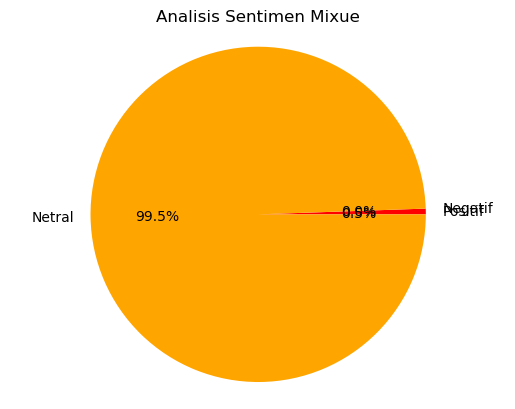

In [24]:
# Test the function with some example text
res = classify_sentiment(text)
 # should print 'positive'
labels = ["Positif", "Negatif", "Netral"]
sizes = [res[0], res[1], res[2]]
colors = ["red", "green", "orange"]
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%")
plt.axis("equal")
plt.title("Analisis Sentimen Mixue")
plt.show()

### Kesimpulan 

Analisis sentimental pada sosial media twitter mengenai mixue para pengguna twiter cenderung netral terhadap
mixue dengan nilai analisis 99% dan 5% sisa nya negatif seperti yang digambarkan dalam piechart diatas 